(1500, 2)


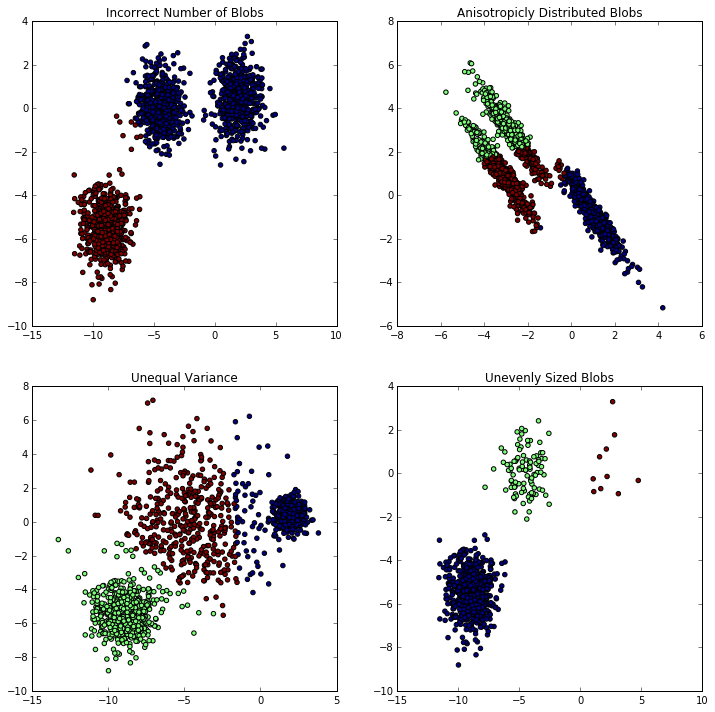

In [11]:
#coding:utf-8
'''
Created on 2016/4/25

@author: Gamer Think
'''
import numpy as np      #科学计算包
import matplotlib.pyplot as plt      #python画图包

from sklearn.cluster import KMeans       #导入K-means算法包
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

'''
make_blobs函数是为聚类产生数据集
产生一个数据集和相应的标签
n_samples:表示数据样本点个数,默认值100
n_features:表示数据的维度，默认值是2
centers:产生数据的中心点，默认值3
cluster_std：数据集的标准差，浮点数或者浮点数序列，默认值1.0
center_box：中心确定之后的数据边界，默认值(-10.0, 10.0)
shuffle ：洗乱，默认值是True
random_state:官网解释是随机生成器的种子
更多参数即使请参考：http://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
'''
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

print X.shape
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)  #在2图里添加子图1
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #scatter绘制散点
plt.title("Incorrect Number of Blobs")   #加标题

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)    #返回的是乘积的形式
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)#在2图里添加子图2
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)#在2图里添加子图3
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)#在2图里添加子图4
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show() #显示图</span>

In [7]:
import numpy as np      #科学计算包
import matplotlib.pyplot as plt      #python画图包
import pandas as pd
from sklearn.cluster import KMeans       #导入K-means算法包
from sklearn.datasets import make_blobs
cluster_classes=5
samples_size=2614
data=pd.read_csv('/home02/chenhuangrong/integrated_training_files.csv',header=None,index_col=False)
data=data.values
data=data.T
y_pred=KMeans(n_clusters=cluster_classes,random_state=0).fit_predict(data)
final_sequence=[]
for i in xrange(cluster_classes):
    temp=np.zeros(samples_size)
    mark_size=0
    for j in y_pred:
        if i==j:
            temp=temp+data[j]
            mark_size=mark_size+1
    temp=temp/mark_size
    final_sequence.append(temp)
final_sequence=np.array(final_sequence).T
print final_sequence
pd.DataFrame(final_sequence).to_csv('/home02/chenhuangrong/cluster_file.csv',header=None,index=None)
print y_pred


[[ 0.94951859  0.91980221  0.79490909  0.83705347  0.85513736]
 [ 0.76288227  0.65724735  0.64881604  0.8408043   0.65025431]
 [ 0.54641245  0.61564572  0.92801383  0.67034626  0.82382793]
 ..., 
 [ 0.68486636  0.77972019  0.54634725  0.38657883  0.4492662 ]
 [ 0.22594067  0.2123745   0.51630699  0.17170836  0.48182282]
 [ 0.25463266  0.30452885  0.5         0.29028315  0.4784246 ]]
[3 3 2 0 2 0 4 4 1 4]
